In [1]:
import nltk 
from nltk.tokenize import word_tokenize 
from nltk import download 
from nltk.tokenize import sent_tokenize
from nltk.tokenize import wordpunct_tokenize
download('punkt__tab' )
download ('stopwords')
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')
from collections import Counter


[nltk_data] Error loading punkt__tab: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1032)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1032)>


In [2]:
%pip install stanza


[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: pip3.13 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import stanza
stanza.download('en')
nlp = stanza.Pipeline('en')

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2026-02-10 22:45:13 INFO: Downloaded file to /Users/uliaocheretina/stanza_resources/resources.json
2026-02-10 22:45:13 INFO: Downloading default packages for language: en (English) ...
2026-02-10 22:45:14 INFO: File exists: /Users/uliaocheretina/stanza_resources/en/default.zip
2026-02-10 22:45:16 INFO: Finished downloading models and saved to /Users/uliaocheretina/stanza_resources
2026-02-10 22:45:16 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2026-02-10 22:45:16 INFO: Downloaded file to /Users/uliaocheretina/stanza_resources/resources.json
2026-02-10 22:45:1

In [24]:
import re

#Harold Pinter(основной автор)

with open('Common_Pinter.txt', 'r', encoding='utf-8') as file:
    pinter = file.read()
    print(pinter[:128])

Act One
The living-room of a house in a seaside town. A door leading to the hall down left. Back door and small window up left.


In [25]:
#начнем с чистки текста от лишнего
#нужно избавиться от имен в роли, лишней пунктуации, привести все в один регистр
def pure(text):
    text=re.sub(r'\b[A-Z]+\.',' ', text)
    text=text.lower()
    text=re.sub(r'[,:;-]|\n',' ', text)
    text=re.sub(r'\s+', ' ', text)
    text=text.strip()
    return text

cleanpint=pure(pinter)
print(cleanpint[:128])

act one the living room of a house in a seaside town. a door leading to the hall down left. back door and small window up left.


In [26]:
#найдем количество вопросов и многоточий + кол-во всех предложений
def question(text):
    text=re.findall(r'\?', text)
    return text

def ellipses(text):
    text=re.findall(r'\.{3,}', text)
    return text


pquestion=question(cleanpint)
pellipses=ellipses(cleanpint)

print(f'кол-во вопросов: {len(pquestion)}')
print(f'кол-во многоточий (хезитаций):{len(pellipses)}')
print(f'кол-во предложений в целом: {len(sent_tokenize(cleanpint))}')

кол-во вопросов: 2256
кол-во многоточий (хезитаций):458
кол-во предложений в целом: 10829


In [31]:
#токенизируем текст и избавимся от всей оставшейся пунктуации
def elements(text):
    text=re.sub(r'[!?...()]|\n',' ', text)
    tokens=word_tokenize(text)
    return(tokens)



wordpint=elements(cleanpint)
print(wordpint[:10])

['\ufeffact', 'one', 'the', 'living', 'room', 'of', 'a', 'house', 'in', 'a']


In [32]:
#избавимся от стоп слов  
ord_stopwords=set(english_stopwords)
ad_stopwords={
   "n't", "'ve", "'d", "'s", "'ll", "'m", "'re", "not", "'t", "\ufeffact", "yes", "ros", "guil", "one", "know", "'", "\ufeffexpanse"

}
new_stopwords=ord_stopwords.union(ad_stopwords)

pint_tokens=[]
removed_words=[]

for token in wordpint:
    if token not in new_stopwords:
        pint_tokens.append(token)
    else:
      removed_words.append(token)

print(pint_tokens[:10]) #список токенов без стоп слов




['living', 'room', 'house', 'seaside', 'town', 'door', 'leading', 'hall', 'left', 'back']


In [33]:
#найдем количетсво pause/silence

def elpause(text):
    text=re.findall(r'pause', text)
    return text

def elsilence(text):
    text=re.findall(r'silence', text)
    return text


pinter_pause=elpause(cleanpint)
pinter_sil=elsilence(cleanpint)
print(f'кол-во маркеров "pause":{len(pinter_pause)}')
print (f'кол-во маркеров "silence": {len(pinter_sil)}')
print(f'кол-во всех слов: {len(wordpint)}')
print(f'кол-во всех не стоп слов: {len(pint_tokens)}')



кол-во маркеров "pause":455
кол-во маркеров "silence": 73
кол-во всех слов: 66042
кол-во всех не стоп слов: 28243


In [34]:
#частотный список
from collections import Counter
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

text_stemmed = []
for word in pint_tokens:
  text_stemmed.append(stemmer.stem(word))


pinter_freq=Counter(text_stemmed)
pinter_freqs=Counter(pint_tokens)
print(pinter_freq.most_common(5))
print(pinter_freqs.most_common(5))

[('paus', 455), ('look', 356), ('got', 339), ('go', 322), ('come', 299)]
[('pause', 453), ('got', 339), ('well', 244), ('see', 217), ('get', 213)]


In [35]:
# облако слов
%pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: pip3.13 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


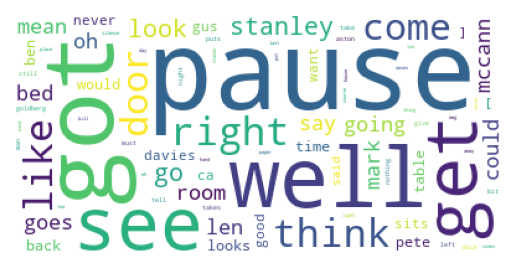

In [36]:
wordcloud = WordCloud(background_color='white', margin=10).generate_from_frequencies(Counter(pint_tokens))
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show() 

In [37]:
#ipm
%pip install ruword-frequency

from ruword_frequency import Frequency


[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: pip3.13 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [39]:
#ipm (относительная частота)
print(f'ipm pause: {pint_tokens.count("pause") / len(wordpint) * 1000000}') 
print(f'ipm silence:{pint_tokens.count("silence") / len(wordpint) * 1000000}')

print(f'ipm ?:{2256/10829*1000000}') #ipm вопросов
print (f'ipm ...:{458/10829*1000000}') #ipm хезитаций


ipm pause: 6859.271372762787
ipm silence:1105.3571969352836
ipm ?:208329.48564041
ipm ...:42293.840613168344


In [43]:
#Samuel Beckett
with open('Samuel_Beckett.txt', 'r', encoding='utf-8') as file:
    beckett = file.read()
    print(beckett[:108])

Expanse of scorched grass rising centre to low mound. Gentle slopes down to front and either side of stage.


In [62]:
#чистим
cleanbeck=pure(beckett) 

#кол-во вопросов и хезитаций
bquestion=question(cleanbeck) 
bellipses=ellipses(cleanbeck)
print(f'кол-во вопросов: {len(bquestion)}')
print(f'кол-во многоточий (хезитаций):{len(bellipses)}')
print(f'кол-во предложений в целом: {len(sent_tokenize(cleanbeck))}')

кол-во вопросов: 750
кол-во многоточий (хезитаций):297
кол-во предложений в целом: 5369


In [63]:
#токенизируем и убираем пунктуацию
wordbeck=elements(cleanbeck)
print(wordbeck[:10])

['\ufeffexpanse', 'of', 'scorched', 'grass', 'rising', 'centre', 'to', 'low', 'mound', 'gentle']


In [ ]:
#список токенов без стоп слов
beck_tokens=[]
removed_words=[]

for token in wordbeck:
    if token not in new_stopwords:
        beck_tokens.append(token)
    else:
      removed_words.append(token)

print(beck_tokens[:10]) 


['scorched', 'grass', 'rising', 'centre', 'low', 'mound', 'gentle', 'slopes', 'front', 'either']


In [46]:
#кол-во pause и silence
beck_pause=elpause(cleanbeck)
beck_sil=elsilence(cleanbeck)
print(f'кол-во маркеров "pause":{len(beck_pause)}')
print (f'кол-во маркеров "silence": {len(beck_sil)}')
print(f'кол-во всех слов: {len(wordbeck)}')
print(f'кол-во всех не стоп слов: {len(beck_tokens)}')

кол-во маркеров "pause":700
кол-во маркеров "silence": 119
кол-во всех слов: 29571
кол-во всех не стоп слов: 14585


[('pause', 699), ('estragon', 177), ('lucky', 154), ('back', 144), ('willie', 139)]


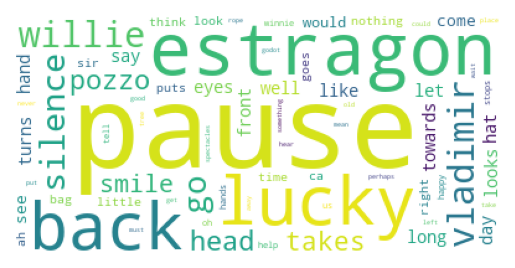

In [47]:
#частотный список
beck_freq=Counter(beck_tokens)
print(beck_freq.most_common(5))

wordcloud = WordCloud(background_color='white', margin=10).generate_from_frequencies(Counter(beck_tokens))
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show() 

In [48]:
#ipm (относительная частота)
print(f'ipm pause:{beck_tokens.count("pause") / len(wordbeck) * 1000000}')
print(f'ipm silence:{beck_tokens.count("silence") / len(wordbeck) * 1000000}')

print(f'ipm ?:{750/5369*1000000}') #ipm вопросов
print (f'ipm ...:{297/5369*1000000}') #ipm хезитаций

ipm pause:23638.023739474487
ipm silence:4024.2129112982316
ipm ?:139690.81765691936
ipm ...:55317.56379214006


In [54]:
#David Mamet
with open('David_Mamet.txt', 'r', encoding='utf-8') as file:
    mamet = file.read()
    print(mamet[:72])

It's nice, the park is nice
EMIL. It's nice.
GEORGE. The park is nice.



In [58]:
cleanmamet=pure(mamet) 

#кол-во вопросов и хезитаций
mquestion=question(cleanmamet) 
mellipses=ellipses(cleanmamet)
print(f'кол-во вопросов: {len(mquestion)}')
print(f'кол-во многоточий (хезитаций):{len(mellipses)}')
print(f'кол-во предложений в целом: {len(sent_tokenize(cleanmamet))}')

#токенизируем и убираем пунктуацию
wordmam=elements(cleanmamet)

кол-во вопросов: 796
кол-во многоточий (хезитаций):364
кол-во предложений в целом: 4094


In [64]:
#токенизируем и убираем пунктуацию
wordmam=elements(cleanmamet)
print(wordmam[:10])

['\ufeffit', "'s", 'nice', 'the', 'park', 'is', 'nice', 'it', "'s", 'nice']


In [65]:
#список токенов без стоп слов
mam_tokens=[]
removed_words=[]

for token in wordmam:
    if token not in new_stopwords:
        mam_tokens.append(token)
    else:
      removed_words.append(token)

print(mam_tokens[:10])

['\ufeffit', 'nice', 'park', 'nice', 'nice', 'park', 'nice', 'forget', 'remember', 'boat']


In [67]:
#кол-во pause и silence
mam_pause=elpause(cleanmamet)
mam_sil=elsilence(cleanmamet)
print(f'кол-во маркеров "pause":{len(mam_pause)}')
print (f'кол-во маркеров "silence": {len(mam_sil)}')
print(f'кол-во всех слов: {len(wordmam)}')
print(f'кол-во всех не стоп слов: {len(mam_tokens)}')


кол-во маркеров "pause":253
кол-во маркеров "silence": 1
кол-во всех слов: 24137
кол-во всех не стоп слов: 10814


[('pause', 253), ('cleaning', 136), ('like', 100), ('well', 99), ('yeah', 98)]


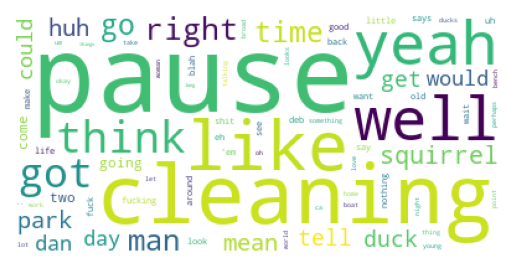

In [68]:
#частотный список
mam_freq=Counter(mam_tokens)
print(mam_freq.most_common(5))

wordcloud = WordCloud(background_color='white', margin=10).generate_from_frequencies(Counter(mam_tokens))
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show() 

In [69]:
#ipm (относительная частота)
print(f'ipm pause:{mam_tokens.count("pause") / len(wordmam) * 1000000}') 
print(f'ipm silence:{mam_tokens.count("silence") / len(wordmam) * 1000000}')

print(f'ipm ?:{796/4094*1000000}') #ipm вопросов
print (f'ipm ...:{364/4094*1000000}') #ipm хезитаций

ipm pause:10481.832870696442
ipm silence:41.43016944939305
ipm ?:194430.87445041523
ipm ...:88910.60087933562


In [72]:
#Tom Stoppard
with open('Tom_Stoppard.txt', 'r', encoding='utf-8') as file:
    stoppard = file.read()
    print(stoppard[:130])

Act One
African sunset.
An open, empty stage, the frame perhaps broken by the branch of a tree. There may be a low skyline but no


In [80]:
cleanstoppard=pure(stoppard) 

#кол-во вопросов и хезитаций
squestion=question(cleanstoppard) 
sellipses=ellipses(cleanstoppard)
print(f'кол-во вопросов: {len(squestion)}')
print(f'кол-во многоточий (хезитаций):{len(sellipses)}')
print(f'кол-во предложений в целом: {len(sent_tokenize(cleanstoppard))}')


кол-во вопросов: 1014
кол-во многоточий (хезитаций):302
кол-во предложений в целом: 5638


In [79]:
#токенизируем и убираем пунктуацию
wordsto=elements(cleanstoppard)
print(wordsto[:10])

['\ufeffact', 'one', 'african', 'sunset', 'an', 'open', 'empty', 'stage', 'the', 'frame']


In [77]:
#список токенов без стоп слов
sto_tokens=[]
removed_words=[]

for token in wordsto:
    if token not in new_stopwords:
        sto_tokens.append(token)
    else:
      removed_words.append(token)

print(sto_tokens[:10])

['african', 'sunset', 'open', 'empty', 'stage', 'frame', 'perhaps', 'broken', 'branch', 'tree']


In [81]:
#кол-во pause и silence
sto_pause=elpause(cleanstoppard)
sto_sil=elsilence(cleanstoppard)
print(f'кол-во маркеров "pause":{len(sto_pause)}')
print (f'кол-во маркеров "silence": {len(sto_sil)}')
print(f'кол-во всех слов: {len(wordsto)}')
print(f'кол-во всех не стоп слов: {len(sto_tokens)}')


кол-во маркеров "pause":123
кол-во маркеров "silence": 11
кол-во всех слов: 45348
кол-во всех не стоп слов: 20712


[('well', 139), ('like', 138), ('wagner', 127), ('would', 122), ('got', 122), ('pause', 119), ('us', 110), ('think', 107), ('go', 101), ('see', 100)]


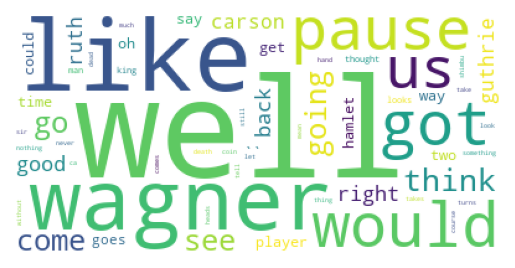

In [82]:
#частотный список
sto_freq=Counter(sto_tokens)
print(sto_freq.most_common(10))

wordcloud = WordCloud(background_color='white', margin=10).generate_from_frequencies(Counter(sto_tokens))
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show() 

In [83]:
#ipm (относительная частота)
print(f'ipm pause:{sto_tokens.count("pause") / len(wordsto) * 1000000}') 
print(f'ipm silence:{sto_tokens.count("silence") / len(wordsto) * 1000000}')
print(f'ipm ?:{1014/5638*1000000}') #ipm вопросов
print (f'ipm ...:{302/5638*1000000}') #ipm хезитаций

ipm pause:2624.1510099673637
ipm silence:242.56858075328572
ipm ?:179851.0109968074
ipm ...:53565.0940049663


In [84]:
#tf/idf (пользовалась помощью deepseek)
%pip install scikit-learn numpy pandas
%pip install pandas

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: pip3.13 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: pip3.13 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [85]:
#tf/idf (пользовалась помощью deepseek для составления этой метрики)
authors_texts = {
    'Pinter': pint_tokens,  
    'Mamet': mam_tokens,
    'Beckett': beck_tokens,
    'Stoppard': sto_tokens
}

# Преобразуем токены обратно в строки для TfidfVectorizer
author_documents = {}
for author, tokens in authors_texts.items():
    author_documents[author] = ' '.join(tokens)

# Создаем корпус документов (каждый автор = один документ)
corpus = list(author_documents.values())
author_names = list(author_documents.keys())

# TF-IDF
vectorizer = TfidfVectorizer(
    max_features=100,  # ограничим количество признаков
    ngram_range=(1, 3),  # учитываем униграммы и биграммы
    min_df=1,  # слово должно встречаться минимум у 4 авторов
    max_df=0.9  # игнорируем слова, встречающиеся у >90% авторов
)

tfidf_matrix = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    index=author_names,
    columns=feature_names
)

print(f"Размер матрицы: {tfidf_df.shape}")
print(f"Авторы: {list(tfidf_df.index)}")



Размер матрицы: (4, 100)
Авторы: ['Pinter', 'Mamet', 'Beckett', 'Stoppard']


In [86]:
# Просмотр топ-слов для каждого автора
def get_top_words_for_author(author_name, top_n=20):
    """Получить топ-N характерных слов для автора"""
    author_row = tfidf_df.loc[author_name]
    top_indices = author_row.nlargest(top_n).index
    top_values = author_row.nlargest(top_n).values
    
    return pd.DataFrame({
        'слово': top_indices,
        'tfidf_score': top_values
    }).reset_index(drop=True)

print(get_top_words_for_author('Pinter', top_n=10))
print(get_top_words_for_author('Mamet', top_n=10))


      слово  tfidf_score
0       len     0.340886
1    mccann     0.321711
2   stanley     0.288916
3      pete     0.283362
4       ben     0.268448
5    davies     0.266317
6      door     0.235262
7  goldberg     0.217315
8       bed     0.195825
9       gus     0.194850
      слово  tfidf_score
0  cleaning     0.588500
1      yeah     0.424066
2  squirrel     0.329311
3       dan     0.268937
4       huh     0.237996
5        em     0.197586
6       deb     0.192098
7   fucking     0.190397
8      park     0.189175
9      duck     0.175162


In [87]:
print(get_top_words_for_author('Beckett', top_n=10))
print(get_top_words_for_author('Stoppard', top_n=10))

          слово  tfidf_score
0      estragon     0.577717
1        willie     0.453688
2      vladimir     0.443896
3         pozzo     0.329658
4         smile     0.179166
5       towards     0.158333
6         godot     0.153405
7        winnie     0.136386
8  willie pause     0.117502
9    spectacles     0.114238
     слово  tfidf_score
0   wagner     0.476517
1   carson     0.335051
2  guthrie     0.331328
3     ruth     0.323883
4   hamlet     0.271764
5   player     0.246548
6     coin     0.186140
7   shimbu     0.174971
8    globe     0.160080
9    milne     0.145189


In [88]:
#функция для поиска общих слов и уникальных для каждого

def compare_authors(author1, author2, author3, author4, top_n=10):
    """Сравнить характерные слова четырех авторов"""
    words_author1 = set(get_top_words_for_author(author1, top_n)['слово'])
    words_author2 = set(get_top_words_for_author(author2, top_n)['слово'])
    words_author3 = set(get_top_words_for_author(author3, top_n)['слово'])
    words_author4 = set(get_top_words_for_author(author4, top_n)['слово'])
    
    common_all = words_author1.intersection(words_author2, words_author3, words_author4)
    
    all_words=words_author1.union(words_author2, words_author3, words_author4)
    unique1 = words_author1 - words_author2.union(words_author3, words_author4) 
    unique2 = words_author2 - words_author1.union(words_author3, words_author4)
    unique3 = words_author3 - words_author1.union(words_author2, words_author4)
    unique4 = words_author4 - words_author1.union(words_author2, words_author3)

    print(f"Общие характерные слова ({len(common_all)}): {common_all}")
    print(f"Уникальные для {author1} ({len(unique1)}): {sorted(unique1)}")
    print(f"Уникальные для {author2} ({len(unique2)}): {sorted(unique2)}")
    print(f"Уникальные для {author3} ({len(unique3)}): {sorted(unique3)}")
    print(f"Уникальные для {author4} ({len(unique4)}): {sorted(unique4)}")

    return common_all, unique1, unique2, unique3, unique4

print(compare_authors('Pinter', 'Mamet', 'Beckett', 'Stoppard', top_n=10))

print(compare_authors('Pinter', 'Mamet', 'Beckett', 'Stoppard', top_n=50))

Общие характерные слова (0): set()
Уникальные для Pinter (10): ['bed', 'ben', 'davies', 'door', 'goldberg', 'gus', 'len', 'mccann', 'pete', 'stanley']
Уникальные для Mamet (10): ['cleaning', 'dan', 'deb', 'duck', 'em', 'fucking', 'huh', 'park', 'squirrel', 'yeah']
Уникальные для Beckett (10): ['estragon', 'godot', 'pozzo', 'smile', 'spectacles', 'towards', 'vladimir', 'willie', 'willie pause', 'winnie']
Уникальные для Stoppard (10): ['carson', 'coin', 'globe', 'guthrie', 'hamlet', 'milne', 'player', 'ruth', 'shimbu', 'wagner']
(set(), {'ben', 'gus', 'davies', 'stanley', 'mccann', 'door', 'len', 'goldberg', 'pete', 'bed'}, {'huh', 'fucking', 'em', 'duck', 'yeah', 'squirrel', 'cleaning', 'dan', 'deb', 'park'}, {'willie pause', 'spectacles', 'vladimir', 'towards', 'estragon', 'smile', 'willie', 'godot', 'winnie', 'pozzo'}, {'ruth', 'globe', 'milne', 'wagner', 'shimbu', 'coin', 'hamlet', 'player', 'carson', 'guthrie'})
Общие характерные слова (9): {'car', 'bloody', 'chair', 'drink', 'door'

In [89]:
%pip install seaborn



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: pip3.13 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Топ-10 слов для каждого автора
top_words_per_author = {}
for author in author_names:
    top_words = get_top_words_for_author(author, 50)
    top_words_per_author[author] = top_words

# Создаем сводную таблицу для визуализации
heatmap_data = pd.DataFrame()
for author, words_df in top_words_per_author.items():
    for _, row in words_df.iterrows():
        heatmap_data.loc[row['слово'], author] = row['tfidf_score']

heatmap_data = heatmap_data.fillna(0)

print(heatmap_data)

            Pinter  Mamet  Beckett  Stoppard
len       0.340886    0.0      0.0  0.000000
mccann    0.321711    0.0      0.0  0.000000
stanley   0.288916    0.0      0.0  0.000000
pete      0.283362    0.0      0.0  0.000000
ben       0.268448    0.0      0.0  0.000000
...            ...    ...      ...       ...
geoffrey  0.000000    0.0      0.0  0.141466
jeep      0.000000    0.0      0.0  0.134020
mageeba   0.000000    0.0      0.0  0.126575
upstage   0.000000    0.0      0.0  0.114469
letter    0.000000    0.0      0.0  0.108598

[100 rows x 4 columns]


In [91]:
#likelihood для анализа частотности слов (пользовалась помощью deepseek)
#на примере Пинтера и Стоппарда
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

#принцип максимального правдоподобия
total1=len(wordpint)
total2=len(wordsto)

results=[]

all_words = set(pinter_freqs. keys()) | set(sto_freq. keys())

for word in all_words:
# Вероятность слова у автора 1
    p1 = pinter_freqs.get(word, 0) / total1
# Вероятность слова у автора 2
    p2 = sto_freq. get (word, 0) / total2

    if p1 > 0 and p2 > 0:
# Логарифм отношения правдоподобий
        log_lr = np. log (p1) - np. log (p2)
        results. append ((word, p1, p2, log_lr))

# Сортируем по абсолютному значению log_lr
results.sort (key=lambda x: abs (x[3]), reverse=True)

print(results)
print("Сравнение Пинтер vs Стоппард:")
print("="*60)
print(f"{'Слово':<15} {'P(Pinter)':<12} {'P(Stoppard)':<12} {'Log LR':<10}")
print("-"*60)

for word, p1, p2, log_lr in results:
    print(f"{word:<15} {p1:<12.6f} {p2:<12.6f} {log_lr:<10.4f}")

[('player', 1.5141879410072378e-05, 0.0018523418893887271, np.float64(-4.80674162795727)), ('stanley', 0.002604403258532449, 2.205168915938961e-05, np.float64(4.771569647699494)), ('mark', 0.002044153720359771, 2.205168915938961e-05, np.float64(4.529349949324471)), ('gus', 0.0017564580115683958, 2.205168915938961e-05, np.float64(4.377665361992406)), ('bill', 0.0010902153175252113, 2.205168915938961e-05, np.float64(3.900741289902097)), ('london', 1.5141879410072378e-05, 0.0007277057422598571, np.float64(-3.872432390580437)), ('james', 0.0008630871263741256, 2.205168915938961e-05, np.float64(3.667126438720592)), ('shoes', 0.000802519608733836, 2.205168915938961e-05, np.float64(3.594367084438164)), ('fade', 0.0007873777293237636, 2.205168915938961e-05, np.float64(3.575318889467469)), ('death', 3.0283758820144755e-05, 0.0009261709446943636, np.float64(-3.42044726683738)), ('window', 0.0006359589352230399, 2.205168915938961e-05, np.float64(3.3617447891694106)), ('king', 4.5425638230217136e-

In [ ]:
#отрицательный рез-т: Stoppard
#положительный рез-т: Pinter